In [39]:
import torch
import numpy as np
import time

## Basic

In [2]:
x = torch.Tensor(4,3)
print(x)


-3.2089e+12  3.0732e-41  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 4x3]



In [3]:
x = torch.rand(4,3)
print(x)
print(x.size())


 0.3113  0.4496  0.5206
 0.9001  0.2110  0.1872
 0.2680  0.4437  0.0932
 0.2526  0.8443  0.9527
[torch.FloatTensor of size 4x3]

torch.Size([4, 3])


In [4]:
y = torch.rand(4,3)
print(x+y)


 0.9020  1.3536  1.1684
 1.4162  0.6846  0.8481
 0.5407  0.8783  0.1679
 0.9625  0.8632  1.2026
[torch.FloatTensor of size 4x3]



In [5]:
print(torch.add(x,y))


 0.9020  1.3536  1.1684
 1.4162  0.6846  0.8481
 0.5407  0.8783  0.1679
 0.9625  0.8632  1.2026
[torch.FloatTensor of size 4x3]



In [6]:
y.add_(x)


 0.9020  1.3536  1.1684
 1.4162  0.6846  0.8481
 0.5407  0.8783  0.1679
 0.9625  0.8632  1.2026
[torch.FloatTensor of size 4x3]

In [7]:
y


 0.9020  1.3536  1.1684
 1.4162  0.6846  0.8481
 0.5407  0.8783  0.1679
 0.9625  0.8632  1.2026
[torch.FloatTensor of size 4x3]

In [8]:
x


 0.3113  0.4496  0.5206
 0.9001  0.2110  0.1872
 0.2680  0.4437  0.0932
 0.2526  0.8443  0.9527
[torch.FloatTensor of size 4x3]

In [9]:
print(x[:,2])


 0.5206
 0.1872
 0.0932
 0.9527
[torch.FloatTensor of size 4]



In [10]:
x.view(12,1)


 0.3113
 0.4496
 0.5206
 0.9001
 0.2110
 0.1872
 0.2680
 0.4437
 0.0932
 0.2526
 0.8443
 0.9527
[torch.FloatTensor of size 12x1]

In [11]:
torch.from_numpy(np.ones(5))


 1
 1
 1
 1
 1
[torch.DoubleTensor of size 5]

In [12]:
np.ones(5)+1

array([2., 2., 2., 2., 2.])

In [16]:
t0 = time.time()
if torch.cuda.is_available():
    print("yo")
    x = x.cuda()
    y = y.cuda()
    x + y
time.time() - t0

yo


0.0005657672882080078

## Autograd

In [52]:
from torch.autograd import Variable

In [53]:
x = Variable(torch.ones(2,2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [54]:
y = x+2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [55]:
print(x.grad_fn)
print(x.grad)
print(y.grad_fn)

None
None


In [56]:
z = y * y * 3
out = z.mean()
print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [57]:
out.backward(torch.Tensor([1]))

print(x.grad)

In [61]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)
y = x*2
while y.data.norm() < 1000:
    y = y*2
print(y)

Variable containing:
 1224.4640
-1010.3592
  693.5117
[torch.FloatTensor of size 3]



In [78]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)
print(x.grad)

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]



In [79]:
x.data


 1.1958
-0.9867
 0.6773
[torch.FloatTensor of size 3]

#### updateds to pytorch where Variable is deprecated

In [117]:
x_ = torch.randn(5,3)
x = torch.autograd.Variable(x_, requires_grad=True)
assert((x_ == x.data).all())
print(x.grad)
print(x.grad_fn)
print(x)

None
None
Variable containing:
-0.2658  0.0017  0.0649
-0.0518  0.0297 -0.3349
 0.0817 -0.7135  0.8807
-0.9248  0.7774 -0.5297
-0.0429 -0.0174 -0.0314
[torch.FloatTensor of size 5x3]



In [87]:
y = x**2
print(y.data)
print(y.grad)
print(y.grad_fn)


 0.0030  0.3285  0.2592
 0.0315  0.4139  8.8323
 1.4347  2.0332  1.5605
 0.8397  0.0500  0.7264
 0.3796  0.4146  1.1874
[torch.FloatTensor of size 5x3]

None


In [88]:
y.backward(torch.ones(5,3))
print(x.grad)

Variable containing:
 -0.2205  -2.2924  -2.0365
 -0.7094  -2.5735 -11.8877
 -4.7912  -5.7037   4.9968
 -3.6653   0.8941  -3.4093
 -2.4643   2.5756   4.3588
[torch.FloatTensor of size 5x3]



In [130]:
z = x*2
z.backward(torch.ones(5,3))

In [131]:
print(x.data)
print(z.data)
print(x.grad)


 0  0  0
 0  0  0
 0  0  0
 0  0  0
 0  0  0
[torch.FloatTensor of size 5x3]


 0  0  0
 0  0  0
 0  0  0
 0  0  0
 0  0  0
[torch.FloatTensor of size 5x3]

Variable containing:
 4  4  4
 4  4  4
 4  4  4
 4  4  4
 4  4  4
[torch.FloatTensor of size 5x3]



##  Neural Network

In [80]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [81]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [82]:
params = list(net.parameters())

In [83]:
print(len(params))

10


In [85]:
print(params[0].size())

torch.Size([6, 1, 5, 5])


In [106]:
input = Variable(torch.randn(1,1,32,32))
output = net(input)
print(output)

Variable containing:
-0.0918 -0.0065  0.0752 -0.0858  0.0375 -0.0520 -0.1249  0.0313 -0.1174 -0.0487
[torch.FloatTensor of size 1x10]



In [107]:
net.zero_grad()
output.backward(torch.randn(1,10))

In [108]:
target = Variable(torch.arange(1,11))
target = target.view(1,-1)
criterion = nn.MSELoss()

In [109]:
loss = criterion(output, target)
print(loss)

Variable containing:
 39.0085
[torch.FloatTensor of size 1]



In [110]:
print(loss.grad_fn)

In [111]:
print(loss.grad_fn.next_functions[0][0])

In [112]:
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [114]:
input = Variable(torch.randn(1,1,32,32))
output = net(input)
target = Variable(torch.arange(1,11))
target = target.view(1,-1)
criterion = nn.MSELoss()
loss = criterion(output, target)

net.zero_grad()
print("conv1.bias.grad before backward")
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
 0.0606
 0.0368
 0.0003
-0.0068
-0.0057
-0.1064
[torch.FloatTensor of size 6]



In [115]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

##  Train a classifier

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root="./data", train=True,
    download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
     shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root="./data", train=False,
    download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
    shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 bird  ship  bird   cat


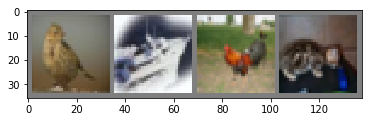

In [16]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(trainloader)

images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' %classes[labels[i]] for i in range(4)))

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [21]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        

SyntaxError: unexpected EOF while parsing (<ipython-input-21-33b72dc28cd5>, line 4)

In [22]:
for i, j in enumerate([1,2,3],0):
    print(i, j)

0 1
1 2
2 3
